# Chapter 6: Decision trees

Similar to SVMs, *decision trees* are machine learning algorithms capable of performing classification, regression and even multi-output tasks. They are suited for complex data sets, and are actually a key component of Random Forests, which we will see later in Chapter 7.

We will start by learning how to train, visualize and make predictions with Decision Trees.

## Training and visualizing a Decision Tree

To understand Decision Trees, let's build one and see how to make predictions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [6]:
from IPython.display import Image
Image(url= "decision_tree_graphviz.png", width=400, height=400)

The Decision Tree is visualized above. When given an instance and asked to classify the iris flower, the algorithm starts at depth 0 by checking whether the petal length is <=2.45cm. If so, it moves to the left child node (depth 1), which has no further children nodes. The decision is made, the predicted class is Iris-Setosa.

However, if the petal length is >2.45cm, the algorithm moves to the right child node (depth 1), and must ask further questions. Is the petal width <= 1.75cm? If so, the flower is classified as Iris-Versicolor (depth 2).

Decision Trees have the advantage of not requiring much data preparation. No scaling or centering is needed.

The samples attribute at each node counts how many training instances this applies to. The value attribute tells us how many training instances from each class this node applies to. For example the bottom-right node tells us this applies to 0 Setosa, 1 Versicolor and 45 Virginica. The gini attribute measures the node's impurity. The top-left depth-1 node only applies to Setosa training instances, therefore it is pure, and has gini=0. The gini score is calculated as follows:

$$G_i = 1 - \sum_{k=1}^{n} p_{i,k} ^2$$

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances of the $i$th node.



Decision Trees are usually fairly intuitive and their decisions are easy to interpret. Such models are often referred to as *white box models* whereas Random Forests or neural networks are generally considered *black box models*. The *white box models* make great predictions and their calculations are easily checked, however it is usually hard to explain in simple terms why the predictions are made. Conversely, Decision Trees usually provide nice, simple classification rules that could in principle even be applied manually (like these flower classifications).

### Estimating class probabilities

Decision Trees can estimate the probability that an instance belongs to a particular class $k$. This is done by traversing the tree and finding the node for this instance. Then the fraction of training instances in this node that are of class $k$ is the probability that the instance is indeed in class $k$. When predicting classes, the class with the highest probability is returned.

For example, what is the probability of being in each class, for a flower of petal length 5cm and width 1.5cm?

In [7]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5,1.5]])

array([1])

There is a 90% probability that the instance is in class Iris-Versicolor.

## The CART training algorithm

Scikit-Learn uses the *Classification And Regression Tree* (CART) algorithm to train Decision Trees. The algorithm splits the training set into two subsets using a single feature $k$ and a cutoff value for that feature. For example, petal length <= 2.45 cm, as in the Decision Tree shown above. The $k$ and cutoff $t_k$ are chosen by searching for a pair $(k, t_k)$, minimizing the following:
$$J(k,t_k) = \frac{m_{\mathrm{left}}}{m}G_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m}G_{\mathrm{right}}$$

where $G_{\mathrm{left/right}}$ measures the impurity of the subsets, and $m_{\mathrm{left/right}}$ is the number of instances in the subsets.

After making the first split into two subsets, finding the minimal purity split, the algorithm gets to work trying to find the best way to split each subset into two more sub-subsets. The depth is the number of times it splits new subsets. It continues recursively, until there is no way of splitting that reduces the impurity, or if it reaches the max_depth parameter. 

### Computational complexity

In order to make predictions, the Decision Tree needs to be propagated through all depths. At each node, only one feature value must be checked, so prediction complexity scales with the number of instances as $O(log_2(m))$, independent of the number of features.

During training, all features are compared (unless max_features is set) at each node. The training complexity depends on both the number of features and instances, scaling as $O(n \times m log(m))$. For small training sets (fewer than 1000s instances) Scikit-Learn can speed up training by presorting the data, but this doesn't work for larger sets.


### Gini impurity or entropy?

The default is to minimize the Gini impurity measure of the two subsets at each node. But another measure that can be used is *entropy*, which makes physicists happy. Most of the time, using the default Gini impurity is a good choice, it's slightly faster and both usually lead to similar trees. However, when the resulting trees do differ, the ones generated from minimizing the entropy tend to be slighltly more balanced.

### Regularization hyperparameters

Decision Trees assume very little about the training data. The tree structure will adapt to the training data, most likely overfitting it if left unconstrained. This is called a *nonparametric model* because the number of parameters is not determined ahead of training. A linear model is *parametric* because the number of parameters is determined ahead of time.

Regularizing a Decision Tree helps avoid overfitting. This can be done by restricting the maximum depth, max_depth. Other options are to restrict the shape of the tree with min_samples_split, which sets the minimum number of samples a node must have before splitting. Also min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes and max_features.

## Regression

Decision Trees are also capable of performing regression tasks. Let's try it out, using the DecisionTreeRegressor class, on a noisy quadratic dataset with max_depth=2.

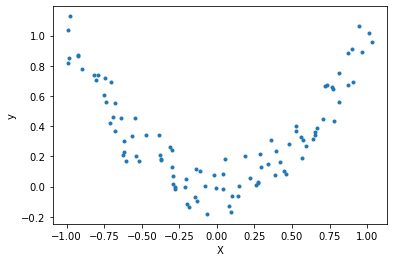

In [9]:
X = np.linspace(-1,1,100)+ np.random.uniform(-.1, .1, 100)
y = X**2 + np.random.uniform(-.2, .2, len(X))
plt.plot(X, y,'.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree_reg = DecisionTreeRegressor(max_depth=2);
tree_reg.fit(X.reshape(-1,1),y.reshape(-1,1));
tree_reg3 = DecisionTreeRegressor(max_depth=3);
tree_reg3.fit(X.reshape(-1,1),y.reshape(-1,1));
tree_reg_unlim = DecisionTreeRegressor();
tree_reg_unlim.fit(X.reshape(-1,1),y.reshape(-1,1));



In [18]:
y_pred = tree_reg.predict(np.linspace(-1,1,100).reshape(-1,1))
y_pred3 = tree_reg3.predict(np.linspace(-1,1,100).reshape(-1,1))
y_pred_unlim = tree_reg_unlim.predict(np.linspace(-1,1,100).reshape(-1,1))

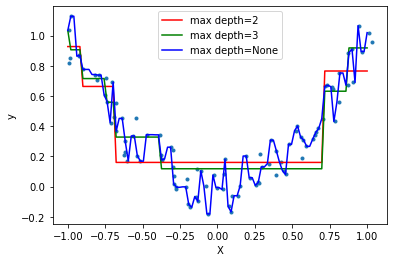

In [19]:
plt.plot(X, y,'.')
plt.plot(np.linspace(-1,1,100), y_pred, 'r', label = 'max depth=2')
plt.plot(np.linspace(-1,1,100), y_pred3, 'g', label = 'max depth=3')
plt.plot(np.linspace(-1,1,100), y_pred_unlim, 'b', label = 'max depth=None')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()